<a href="https://colab.research.google.com/github/kimchaeyoung-student/pdm04/blob/master/py-tensorflow/tf2_9_an_intro_TL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Intro to TL
- **TL** : Transfer Learning

This Colab notebook reviews how to load and inspect a pretrained ConvNet with tf.Keras, and then use it as a classifier on a single image.

> https://github.com/PacktPublishing/Hands-On-Transfer-Learning-with-TensorFlow-2.0-Video

> https://github.com/ExcelsiorCJH/Deep-Learning-with-Python/blob/master/Chap05-Deep_learning_for_computer_vision/5.3-using-a-pretrained-convnet.ipynb

> https://github.com/rickiepark

In [1]:
# Enable TensorFlow 2.0
%tensorflow_version 2.x

## Imports

In [2]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [3]:
import numpy as np
import matplotlib.pylab as plt

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications.imagenet_utils import decode_predictions

## Load pretrained ConvNet

In [4]:
# Load pretrained model VGG16
vgg16_model = tf.keras.applications.VGG16(
              weights="imagenet", 
              input_shape=(224, 224, 3),
              include_top = True)

553467904/553467096 [==============================] - 4s 0us/step


In [6]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
len(vgg16_model.layers)

23

## Use pretrained ConvNet to classify one image

In [8]:
# define a class that load and preprocess one image
def load_process_image(file_path):

  # Load image (in PIL image format by default)
  image_original = load_img(file_path, target_size=(224, 224))
  print("Image size after loading", image_original.size)

  # Convert from numpy array
  image_array = img_to_array(image_original)
  print("Image size after converting to numpy array", image_array.shape)

  # Expand dims to add batch size as 1
  image_batch = np.expand_dims(image_array, axis=0)
  print("Image size after expanding dimension", image_batch.shape)

  # Preprocess image
  image_preprocessed = tf.keras.applications.vgg16.preprocess_input(image_batch)

  return image_original, image_preprocessed

In [11]:
# Set image file path
cat_image_file_path = "/content/iju_cat.png"

In [12]:
cat_image_original, cat_image_preprocessed = load_process_image(cat_image_file_path)

Image size after loading (224, 224)
Image size after converting to numpy array (224, 224, 3)
Image size after expanding dimension (1, 224, 224, 3)


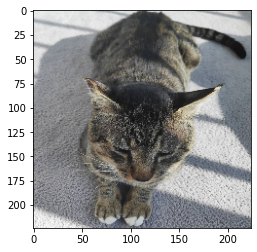

In [13]:
plt.imshow(cat_image_original)

In [14]:
# Get the predictions by the model
predictions = vgg16_model.predict(cat_image_preprocessed)

In [15]:
# There are 1000 predictions
predictions.shape

(1, 1000)

In [16]:
# Get the prediction class with the highest probrabilities
predicted_class = decode_predictions(predictions, top=1)
# result of prediction
predicted_class 

40960/35363 [==================================] - 0s 0us/step


[[('n02123045', 'tabby', 0.73079246)]]

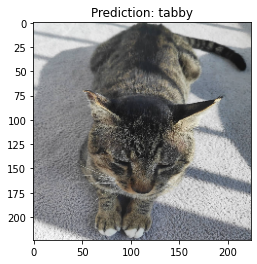

In [17]:
# Show the image along with the predicted class
plt.imshow(cat_image_original)
predicted_class_name = predicted_class[0][0][1]
_ = plt.title("Prediction: " + predicted_class_name)

***

In [20]:
# Set image file path
coffee_image_file_path = "/content/coffee.png"

In [21]:
coffee_image_original, coffee_image_preprocessed = load_process_image(coffee_image_file_path)

Image size after loading (224, 224)
Image size after converting to numpy array (224, 224, 3)
Image size after expanding dimension (1, 224, 224, 3)


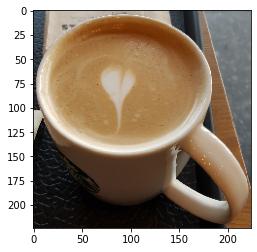

In [23]:
plt.imshow(coffee_image_original)

In [24]:
# Get the predictions by the model
predictions = vgg16_model.predict(coffee_image_preprocessed)

In [25]:
# There are 1000 predictions
predictions.shape

(1, 1000)

In [26]:
# Get the prediction class with the highest probrabilities
predicted_class = decode_predictions(predictions, top=1)
# result of prediction
predicted_class 

[[('n07920052', 'espresso', 0.82477546)]]

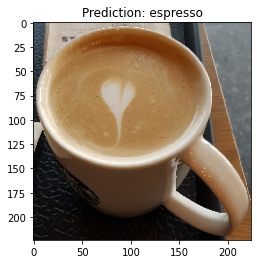

In [27]:
# Show the image along with the predicted class
plt.imshow(coffee_image_original)
predicted_class_name = predicted_class[0][0][1]
_ = plt.title("Prediction: " + predicted_class_name)

***

In [28]:
# Set image file path
bat_image_file_path = "/content/bat.png"

In [29]:
bat_image_original, bat_image_preprocessed = load_process_image(bat_image_file_path)

Image size after loading (224, 224)
Image size after converting to numpy array (224, 224, 3)
Image size after expanding dimension (1, 224, 224, 3)


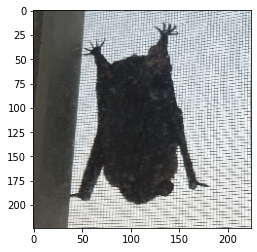

In [30]:
plt.imshow(bat_image_original)

In [31]:
# Get the predictions by the model
predictions = vgg16_model.predict(bat_image_preprocessed)

In [32]:
# There are 1000 predictions
predictions.shape

(1, 1000)

In [33]:
# Get the prediction class with the highest probrabilities
predicted_class = decode_predictions(predictions, top=1)
# result of prediction
predicted_class 

[[('n02093859', 'Kerry_blue_terrier', 0.3864029)]]

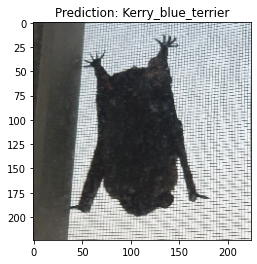

In [34]:
# Show the image along with the predicted class
plt.imshow(bat_image_original)
predicted_class_name = predicted_class[0][0][1]
_ = plt.title("Prediction: " + predicted_class_name)